In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import datetime
import psutil
import math
import seaborn as sns
from datetime import timedelta, datetime, tzinfo, timezone, time
from PIL import Image, ImageDraw
from numpy import asarray

In [2]:
def show_data():
    train_folder = [7554]#,7556,7557,7558,7559,7560,7561,7563,7569,7570,7571,7572,7573,7574]
    for j in train_folder:
        for i in range(1,22):
            url = r"train/"+str(j)+"/SimpleTest/"+str(i)+".csv"
            data = pd.read_csv(url)
            data.columns = data.columns.str.replace(' ', '')
            submit_time = data.iloc[-1][0]
            start_time = data.iloc[-2][0]
            data.dropna(inplace=True)
            data['X'] = data.X.astype(float)
            data.Time = data.Time.str.replace("00:","").astype(np.float64)
            
            fig=plt.figure(figsize=(20,5))

            ax= fig.add_subplot(1, 2, 1)
            ax.plot(data.Pressure,"#FF8000")
            ax.set_title("Pressure",fontdict={'fontsize': 20})

            ax2 = fig.add_subplot(1, 2, 2)
            ax2.plot(data.Time,c='b')
            ax2.set_title("Time",fontdict={'fontsize': 20})

            plt.show()
            hand_lifts = 0
            rolling_std = data.Time.rolling(window=20).std()

            for i in range(len(data.Time)-1):
                if (data.Time[i+1] > data.Time[i] + rolling_std[i]):
                    hand_lifts +=1

            print("Number of hand lifts: " + str(hand_lifts))

>  Notice that file number 22 does not exist (there is only an empty image), we will ignore this file.

In [3]:
data = pd.read_csv(r'train/7572/SimpleTest/4.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          146 non-null    object 
 1    Y         144 non-null    float64
 2    Pressure  144 non-null    float64
 3    TiltX     144 non-null    float64
 4    TiltY     144 non-null    float64
 5    Time      144 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.0+ KB


In [5]:
#remove the extra spaces in the columns.
print(data.columns)
data.columns = data.columns.str.replace(' ', '')
data.head(3)

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')


,X,Y,Pressure,TiltX,TiltY,Time
0,450.3,522.753333,0.343750,13070.0,12127.0,00:01.4109704
1,453.2925,521.106667,0.373535,13070.0,12127.0,00:01.4265911
2,456.855,519.206667,0.376465,13016.0,12078.0,00:01.4487368


In [6]:
submit_time = data.iloc[-1][0]
start_time = data.iloc[-2][0]
data.dropna(inplace=True)

print(start_time)
print(submit_time)

Time Elapsed till drawing started: 00:01.4109704
Time Elapsed till drawing submit: 00:03.7496841


In [7]:
total_time = float(submit_time[37:]) - float(start_time[38:])
print("Total time drawing: 00:" +str(total_time))

Total time drawing: 00:2.3387137


In [8]:
data['X'] = data.X.astype(float)

In [9]:
# change the Time column to float
data.Time = data.Time.str.replace("00:","").astype(np.float64)

In [10]:
data.head(3)

,X,Y,Pressure,TiltX,TiltY,Time
0,450.3000,522.753333,0.343750,13070.0,12127.0,1.410970
1,453.2925,521.106667,0.373535,13070.0,12127.0,1.426591
2,456.8550,519.206667,0.376465,13016.0,12078.0,1.448737


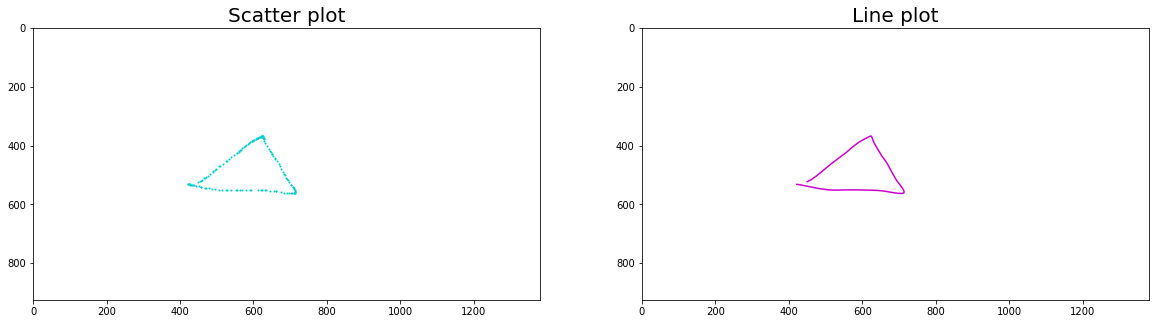

In [11]:
fig=plt.figure(figsize=(20,5))
ax= fig.add_subplot(1, 2, 1)

plt.gca().invert_yaxis()
ax.scatter(data.X,data.Y,s=1,c='#00CCCC')
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
ax.set_title("Scatter plot",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
plt.gca().invert_yaxis()
ax2.plot(data.X,data.Y,"#CC00CC")
ax2.set_xbound(lower=0.0, upper=1381)
ax2.set_ybound(lower=0.0, upper=925)
ax2.set_title("Line plot",fontdict={'fontsize': 20})

plt.show()

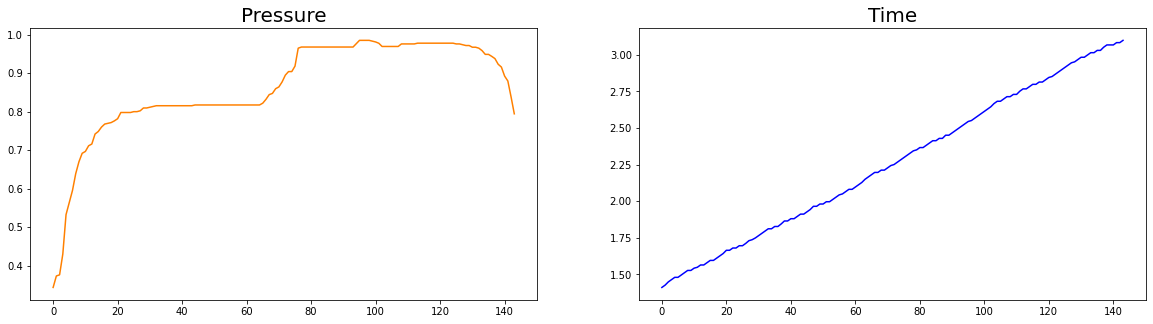

In [12]:
fig=plt.figure(figsize=(20,5))

ax= fig.add_subplot(1, 2, 1)
ax.plot(data.Pressure,"#FF8000")
ax.set_title("Pressure",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(data.Time,c='b')
ax2.set_title("Time",fontdict={'fontsize': 20})

plt.show()

## *Hand lifts:*

In [13]:
hand_lifts = 0
rolling_std = data.Time.rolling(window=20).std()

for i in range(len(data.Time)-1):
    if (data.Time[i+1] > data.Time[i] + rolling_std[i]):
        hand_lifts +=1
        
print("Number of hand lifts: " + str(hand_lifts))

Number of hand lifts: 0


## *Number of lines:*

In [14]:
distance = []
for x in range(len(data.X)-1):
        distance.append(math.sqrt((data.X[x+1] - data.X[x])**2 + (data.Y[x+1] - data.Y[x])**2))       

In [15]:
distance =pd.Series(distance)

In [16]:
print('max distance:',max(distance),'\nmin distance:',min(distance),'\nmean distance:',distance.mean())

max distance: 18.24395790391987 
min distance: 0.0 
mean distance: 5.200223415759957


In [17]:
slopes = [] 
for i in range(len(data.X)-1):
    if (data.X[i+1]- data.X[i]) == 0: 
        slopes.append(math.nan)
    else:
        slopes.append((data.Y[i+1]- data.Y[i])/(data.X[i+1]- data.X[i]))

In [18]:
slopes = pd.Series(slopes)

In [19]:
slopes.fillna(0,inplace=True)

In [20]:
slopes.std()

2.052487925785964

In [21]:
numOfLines = 1
rolling_std = slopes.rolling(window=20).std()

for i in range(len(slopes)-1):
    if (slopes[i+1] > slopes[i] + rolling_std[i]) or (slopes[i+1] <= slopes[i] - rolling_std[i]):
        numOfLines = numOfLines + 1

print("Number of hand lifts: " + str(numOfLines))

Number of hand lifts: 30


## *Open or closed shape:*
Only relevant for a number of drawing

(3,4,8,11,13,16,17,19,20,21)

In [25]:
img = Image.open(r'train/7572/SimpleTest/4.PNG')
img = img.convert("RGB")
img = img.crop((0,220,1360,885))

In [26]:
target_pixel = (0,0)
target_color = (255,255,0)
ImageDraw.floodfill(img,target_pixel,target_color)#,thresh=0.5
im = asarray(img)

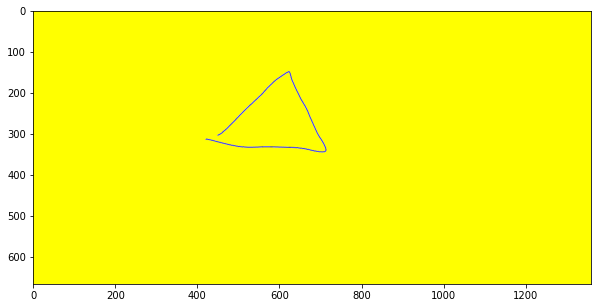

In [27]:
fig = plt.figure(figsize=(10, 7))
  
fig.add_subplot(1, 1, 1)
plt.imshow(img)


In [28]:
count =0 
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        for q in range(3):
            if ((im[i][j] == [255,255,255]).all() == True):
                count+=1
if count == 0:
    print ("Open Shape")
else: 
    print ("Close Shape")

Open Shape


<IPython.core.display.Javascript object>


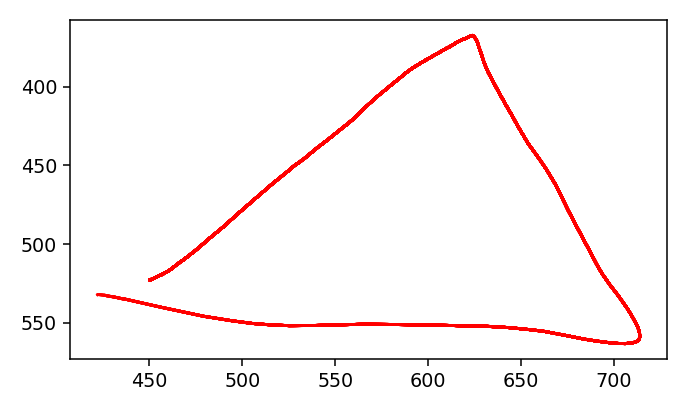

In [29]:
#import psutil
%matplotlib notebook

#plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure(figsize=(5,3),dpi=100)
ax = fig.add_subplot(111)
plt.gca().invert_yaxis()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
plt.tight_layout()
plt.show()


In [30]:
c=[]
d=[]
for i in range (len(data.X)):
    c.append(data.X[i])
    d.append(data.Y[i])
    plt.tight_layout()
    ax.plot(c,d , color='r')
    fig.canvas.draw() 
plt.close()


<IPython.core.display.Javascript object>


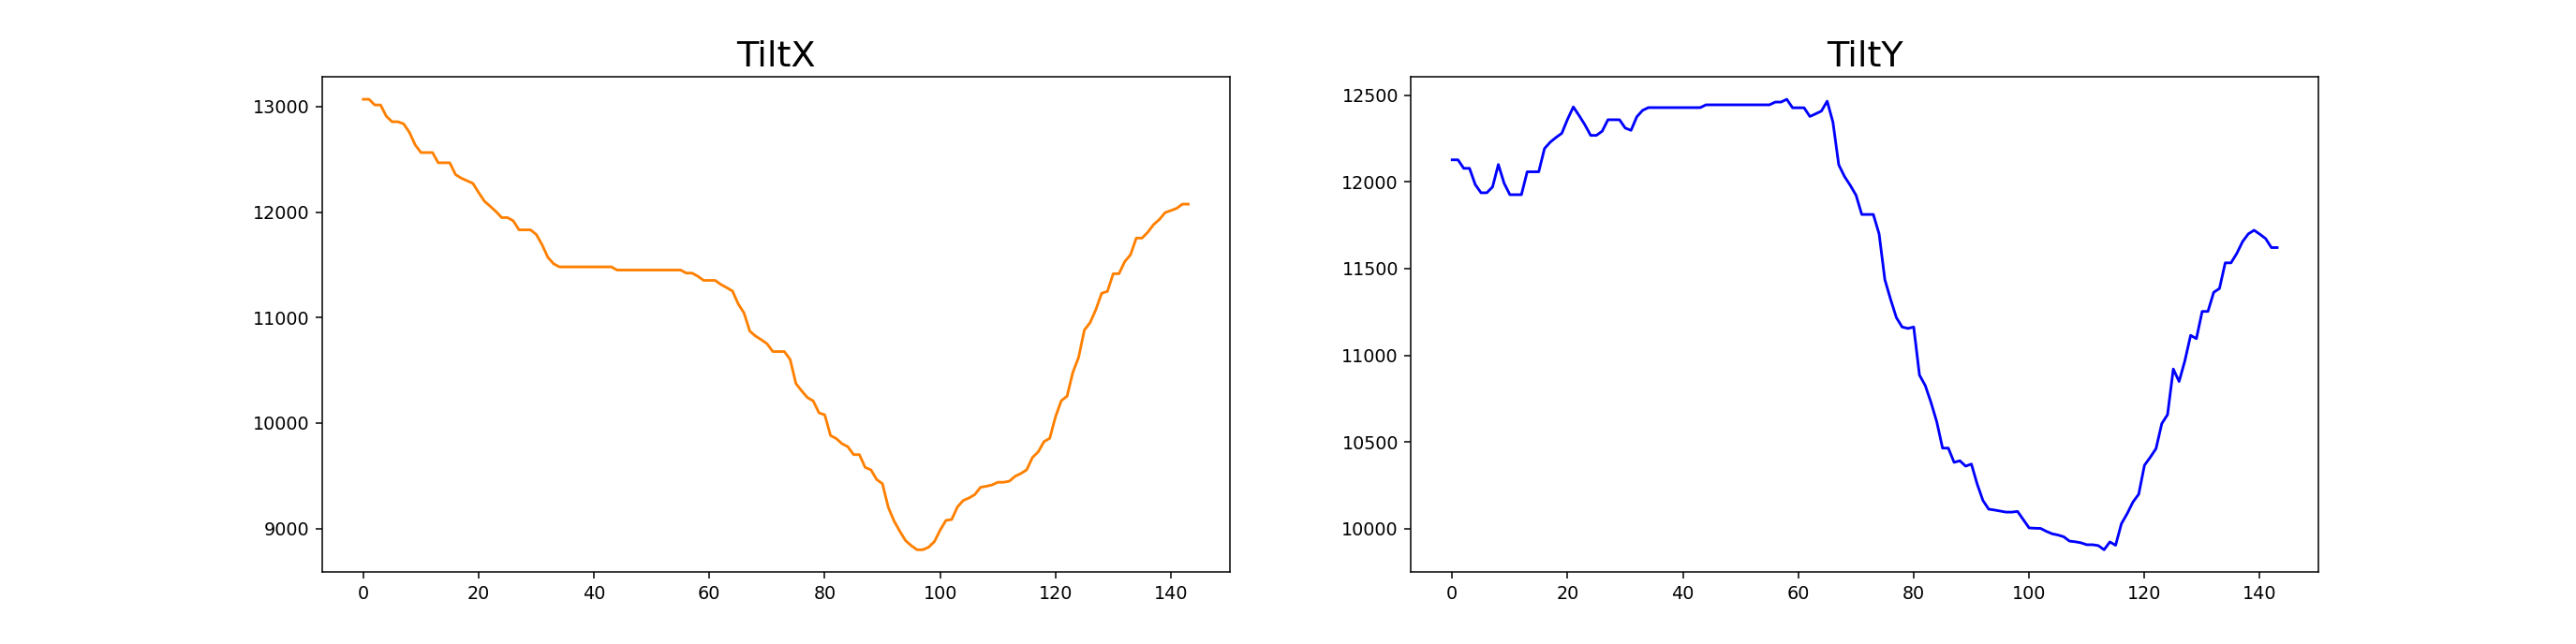

In [31]:
fig=plt.figure(figsize=(20,5))

ax= fig.add_subplot(1, 2, 1)
ax.plot(data.TiltX,"#FF8000")
ax.set_title("TiltX",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(data.TiltY,c='b')
ax2.set_title("TiltY",fontdict={'fontsize': 20})

plt.show()